# Support Vector Machines

## Synthetic two feature binary classification dataset.

`synthetic_binary.csv` is a synthetic (not-real) dataset for a binary classification task. The dataset has two continuous features `feature 1` and `feature 2`, and a binary output label `output`. 

---
## Step 1: Read the dataset and pre-process the features

- read in 'synthetic_binary.csv'
- create X_data, y_data numpy arrays
- STRATIFY split X_data, y_data into 80-20% X_train, y_train, X_test, y_test using scitkit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- further STRATIFY split X_data, y_data into 80-20% X_train, y_train, X_test, y_test using scitkit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- Standard-Scale feature 1 and feature 2. Use scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for this step.

Note: use random_state=20211008

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

data_df = pd.read_csv('./synthetic_binary.csv')

display(data_df.head())

,feature 1,feature 2,output
0,-1.36,6.69,0.0
1,-8.12,-10.64,1.0
2,8.03,-9.94,1.0
3,-3.39,5.50,0.0
4,9.99,5.57,1.0


In [3]:
feat_df = data_df[['feature 1', 'feature 2']]
output_df = data_df['output']

# create X_data, y_data
X_data = feat_df.values
y_data = output_df.values

# split into train-val-test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=20211008, stratify=y_data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=20211008, stratify=y_train)

print('X_data={}'.format(X_data.shape))
print('X_train={}, X_val={}, X_test={}'.format(X_train.shape, X_val.shape, X_test.shape))
print('y_train={}, y_val={}, y_test={}'.format(y_train.shape, y_val.shape, y_test.shape))
print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))
print('class % in y_val = {}'.format((np.unique(y_val, return_counts=True)[1]/y_val.shape[0]).round(2)))
print('class % in y_test = {}'.format((np.unique(y_test, return_counts=True)[1]/y_test.shape[0]).round(2)))

X_data=(550, 2)
X_train=(352, 2), X_val=(88, 2), X_test=(110, 2)
y_train=(352,), y_val=(88,), y_test=(110,)

class % in y_train = [0.45 0.55]
class % in y_val = [0.45 0.55]
class % in y_test = [0.45 0.55]


C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X_train Synthetic dataset for a binary classification two-feature task')

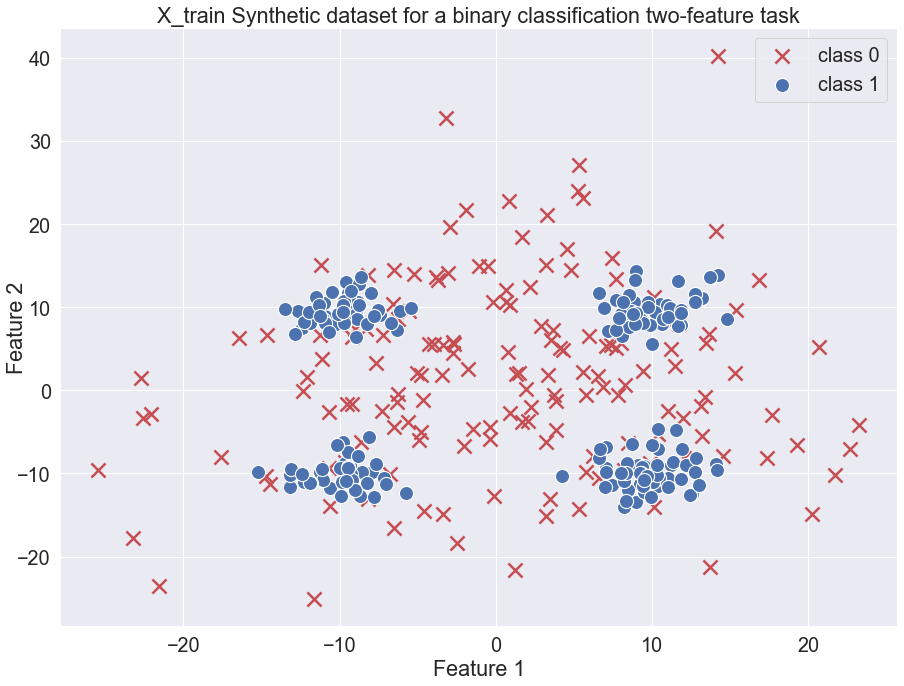

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=1.8)

plt.figure(figsize=(15,11))

X_train_1 = X_train[np.where(y_train==1)[0]]
X_train_0 = X_train[np.where(y_train==0)[0]]
sns.scatterplot(X_train_0[:,0], X_train_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_train_1[:,0], X_train_1[:,1], marker='o', s=200, color='b', zorder=2, label='class 1')

plt.ylabel('Feature 2', labelpad=-10)
plt.xlabel('Feature 1')
plt.title('X_train Synthetic dataset for a binary classification two-feature task')

---
## Step 2: Find best  SVM configuration using X_train, y_train and X_val, y_val

- We will try various SVM kernels, i.e., linear, polynomial with various degrees, and RBF. 
- See which kernel gives you the best result on the validation set.
- You can check the documentation at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


**Note: We do not need to explicitly expand the features as in Logistic Regression classifier. We will use the kernel trick in SVM which is already implemented in the sklearn library**

In [5]:
from sklearn.svm import SVC
####### ADD YOUR CODE ####
kernels_list = ['linear', 'poly', 'rbf']
degrees_list = [1, 2, 3, 4, 5, 6, 8, 9, 10]

best_degree = 1
best_acc = 0.0
best_ker = "linear"
for ker in kernels_list:
    for degree_val in degrees_list:

        clf = SVC(kernel=ker, max_iter=1000, degree = degree_val)
        clf.fit(X_train,y_train)

        y_pred_on_train = clf.predict(X_train)
        train_acc = sklearn.metrics.accuracy_score(y_true=y_train, y_pred=y_pred_on_train)

        y_pred_on_val = clf.predict(X_val)
        val_acc = sklearn.metrics.accuracy_score(y_true=y_val, y_pred=y_pred_on_val)
        
        print("Setting kernel={}, degree={}, train_acc={:.2f}, val_acc={:.2f}".format(best_ker, degree_val, train_acc, val_acc))
        if val_acc > best_acc:
            best_acc = val_acc
            best_degree = degree_val 
            best_ker = ker   

print("Best setting kernel={}, degree={}, val_acc={:.2f}".format(best_ker, best_degree, best_acc))

C:\Users\omar\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\omar\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\omar\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\omar\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

Setting kernel=linear, degree=1, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=2, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=3, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=4, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=5, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=6, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=8, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=9, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=10, train_acc=0.42, val_acc=0.47
Setting kernel=linear, degree=1, train_acc=0.55, val_acc=0.55
Setting kernel=poly, degree=2, train_acc=0.58, val_acc=0.57
Setting kernel=poly, degree=3, train_acc=0.60, val_acc=0.57
Setting kernel=poly, degree=4, train_acc=0.71, val_acc=0.69
Setting kernel=poly, degree=5, train_acc=0.57, val_acc=0.55
Setting kernel=poly, degree=6, train_acc=0.71, val_acc=0.68
Setting kernel=poly, degree=8, train_acc=0.66, val_acc=0.62
Setting kernel=poly

In [6]:
# evaluate the best model on X_test, y_test
####### ADD YOUR CODE ####
# merge train and val data
X_train_val_merge = np.vstack([X_train, X_val]) 
y_train_val_merge = np.hstack([y_train, y_val]) 

clf = SVC(kernel=best_ker, max_iter=1000, degree = best_degree)
clf.fit(X_train_val_merge, y_train_val_merge)

y_pred_on_test = clf.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred_on_test)

print("setting kernel={}, degree={}, test_acc={:.2f}".format(best_ker, best_degree, test_acc))

setting kernel=rbf, degree=1, test_acc=0.84


## Step 3: Plot the decision Boundary

Plot the decision boudary and show the test samples on the plot

C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


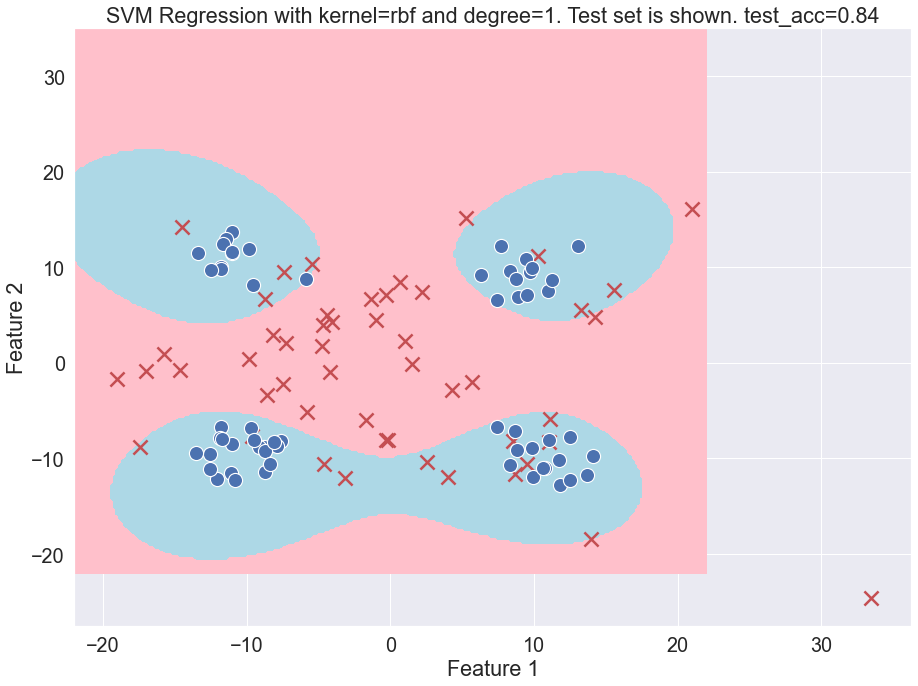

In [13]:
from matplotlib.colors import ListedColormap
####### ADD YOUR CODE ####

lims = 22
x_pts = np.linspace(-lims, lims, 250)
y_pts = np.linspace(-lims, 35, 250)

xx, yy = np.meshgrid(x_pts, y_pts)
pts_init = np.c_[xx.ravel(), yy.ravel()]

Z = clf.predict(pts_init)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,11));
X_test1 = X_test[np.where(y_test==1)[0]]
X_test0 = X_test[np.where(y_test==0)[0]]

sns.scatterplot(X_test0[:,0], X_test0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2)
sns.scatterplot(X_test1[:,0], X_test1[:,1], marker='o', s=200, color='b', zorder=2)

cmap_light = ListedColormap(['pink', 'lightblue'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

plt.ylabel('Feature 2')
plt.xlabel('Feature 1')

plt.title('SVM Regression with kernel={} and degree={}. Test set is shown. test_acc={:.2f}'.format(best_ker, best_degree, test_acc));